<a href="https://colab.research.google.com/github/SuperDuck1892/A.I_Class/blob/main/W9_cifar10_31_3_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [2]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


so hinh la: [3]


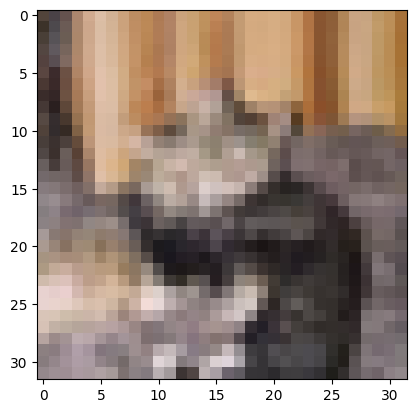

In [3]:
digit=x_train[1892]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show
print('so hinh la:',y_train[1892])

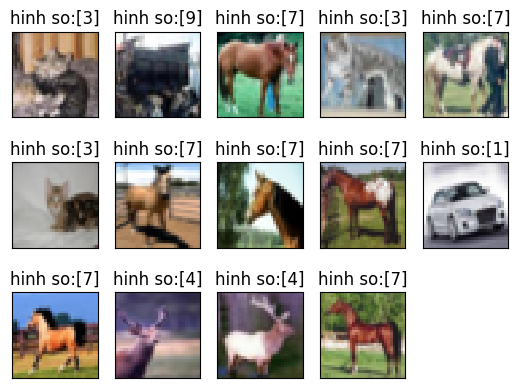

In [4]:
for i in range(14):
   plt.subplot(3,5,i+1)
   plt.tight_layout
   plt.imshow(x_train[i+1892],cmap='gray',interpolation='none')
   plt.title( 'hinh so:{}'.format(y_train[i+1892]))
   plt.xticks([])
   plt.yticks([])

In [ ]:
from keras.models import Sequential #Senquential  mo ta ANN theo tuan tu cac lop #ke tiep lien tuc nhau
from keras.layers import Dense      #Dense=full_connected( su ket noi daydu)  
model = Sequential()    
model.add(Dense(10000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10000)             30730000  
                                                                 
 dense_1 (Dense)             (None, 10)                100010    
                                                                 
Total params: 30,830,010
Trainable params: 30,830,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = x_train.reshape((50000,32*32*3))  #chỉnh lại kích thước số dữ liệu đầu vào 
x_train = x_train.astype('float32')/255   #chuyển qua float để có thể chia được (dữ liệu từ 0->1)

x_test = x_test.reshape((10000,32*32*3))  
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
from keras.utils import to_categorical    #to_categorical: chuyển từ 1 bit thành nhiều bit đầu ra 
y_train = to_categorical(y_train,10)  #từ 1 bit thành 10 bit
y_test = to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',  #Đánh giá sự mất mát (loss)
              metrics=['accuracy']) #Đo lường độ chính xác (metrics)
model.fit(x_train,y_train,epochs=10,batch_size=128)   #10 lần học, mỗi lần học 128 lần ngẫu nhiên
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)

Epoch 1/10
391/391 [==============================] - 338s 863ms/step - loss: 2.7486 - accuracy: 0.2639
Epoch 2/10
391/391 [==============================] - 331s 846ms/step - loss: 1.7823 - accuracy: 0.3637
Epoch 3/10
391/391 [==============================] - 344s 879ms/step - loss: 1.6934 - accuracy: 0.3970
Epoch 4/10
391/391 [==============================] - 330s 845ms/step - loss: 1.6278 - accuracy: 0.4207
Epoch 5/10
391/391 [==============================] - 339s 868ms/step - loss: 1.5848 - accuracy: 0.4399
Epoch 6/10
391/391 [==============================] - 301s 770ms/step - loss: 1.5451 - accuracy: 0.4533
Epoch 7/10
391/391 [==============================] - 297s 761ms/step - loss: 1.5137 - accuracy: 0.4659
Epoch 8/10
391/391 [==============================] - 291s 744ms/step - loss: 1.4861 - accuracy: 0.4744
Epoch 9/10
391/391 [==============================] - 315s 807ms/step - loss: 1.4621 - accuracy: 0.4832
Epoch 10/10
313/313 [==============================] - 24s 76ms/

In [ ]:
model.save('test.h5')

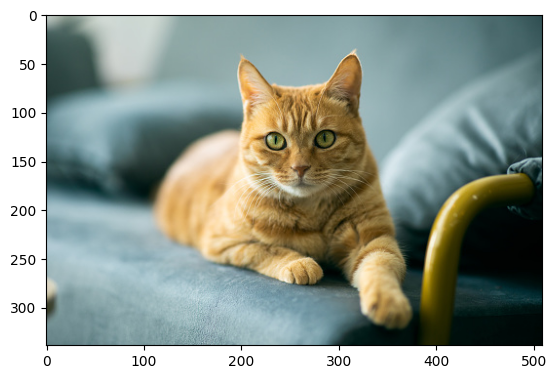

In [ ]:
img=plt.imread('meo.jpg')
plt.imshow(img)
plt.show()

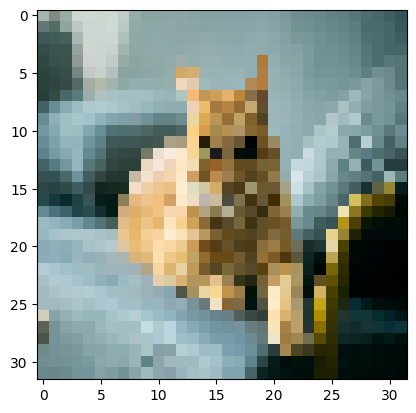

In [ ]:
from keras.utils import load_img, img_to_array
img = load_img("meo.jpg", target_size=(32,32))
plt.imshow(img)

In [ ]:
import numpy as np
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)

1/1 [==============================] - 0s 45ms/step


array([3])

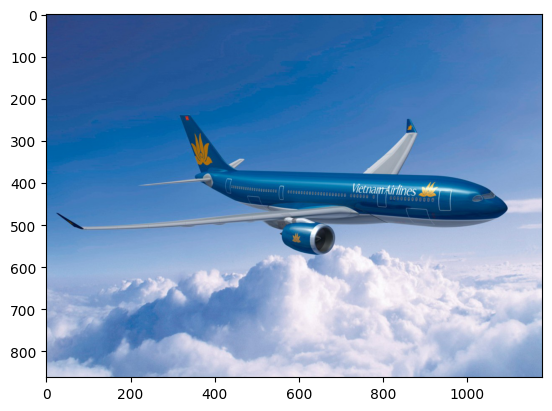

In [ ]:
img=plt.imread('maybay.jpg')
plt.imshow(img)
plt.show()

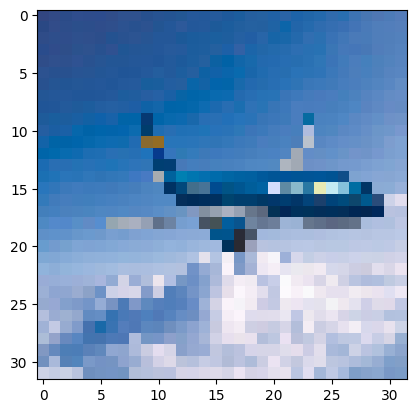

In [ ]:
from keras.utils import load_img, img_to_array
img = load_img("maybay.jpg", target_size=(32,32))
plt.imshow(img)

In [ ]:
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)

1/1 [==============================] - 0s 58ms/step


array([0])